#Digital Image Processing - Segmentação - 2022.1
##Aluno: Derek Nielsen Araújo Alves - Engenharia de Computação - 17212092
##Professor: Tiago Vieira


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [16]:
def pltImgs(imgs, tits):
  plt.figure(figsize = (10*len(tits), 10), facecolor='silver')

  for i in range(len(imgs)):
      plt.subplot(1, len(imgs), i+1)
      plt.imshow(imgs[i])
      plt.title(tits[i])
  plt.show()

#Slide 28

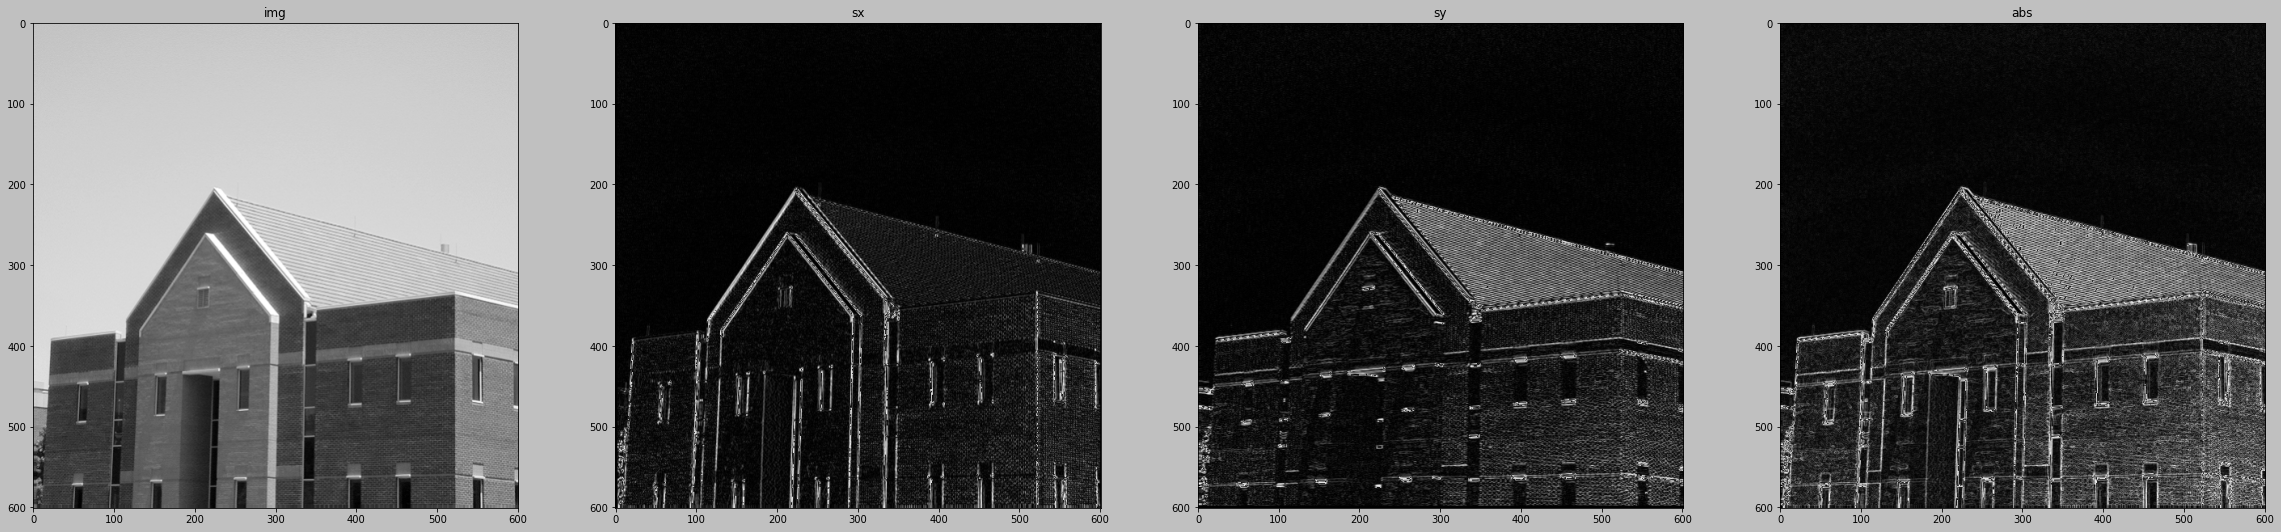

In [11]:
img = cv2.imread('building.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sx = cv2.Sobel(img, cv2.CV_16S, 1, 0)
sx = np.abs(sx).astype(np.uint8)
sy = cv2.Sobel(img, cv2.CV_16S, 0, 1)
sy = np.abs(sy).astype(np.uint8)
abs = sx + sy
pltImgs([img, sx, sy, abs], ['img', 'sx', 'sy', 'abs'])

#Slide 29

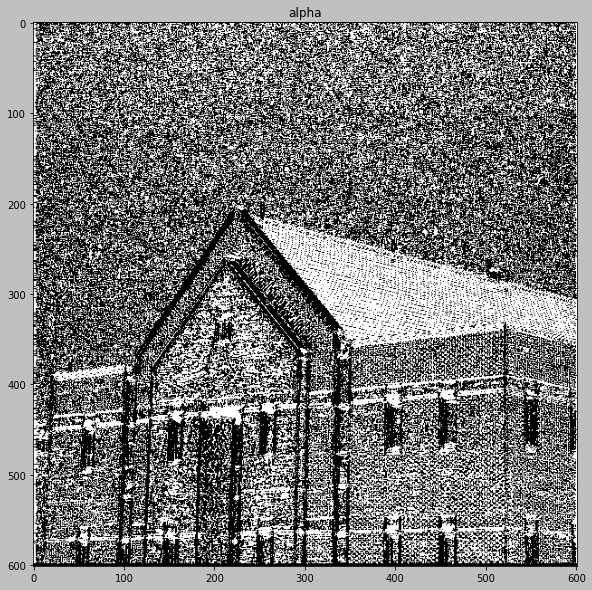

In [12]:
n = np.zeros((600, 600))
sa = np.arctan2(sy, sx).astype(np.uint8)
sa = cv2.normalize(sa, n, 0, 255, cv2.NORM_MINMAX)
pltImgs([sa], ['alpha'])

#Slide 30

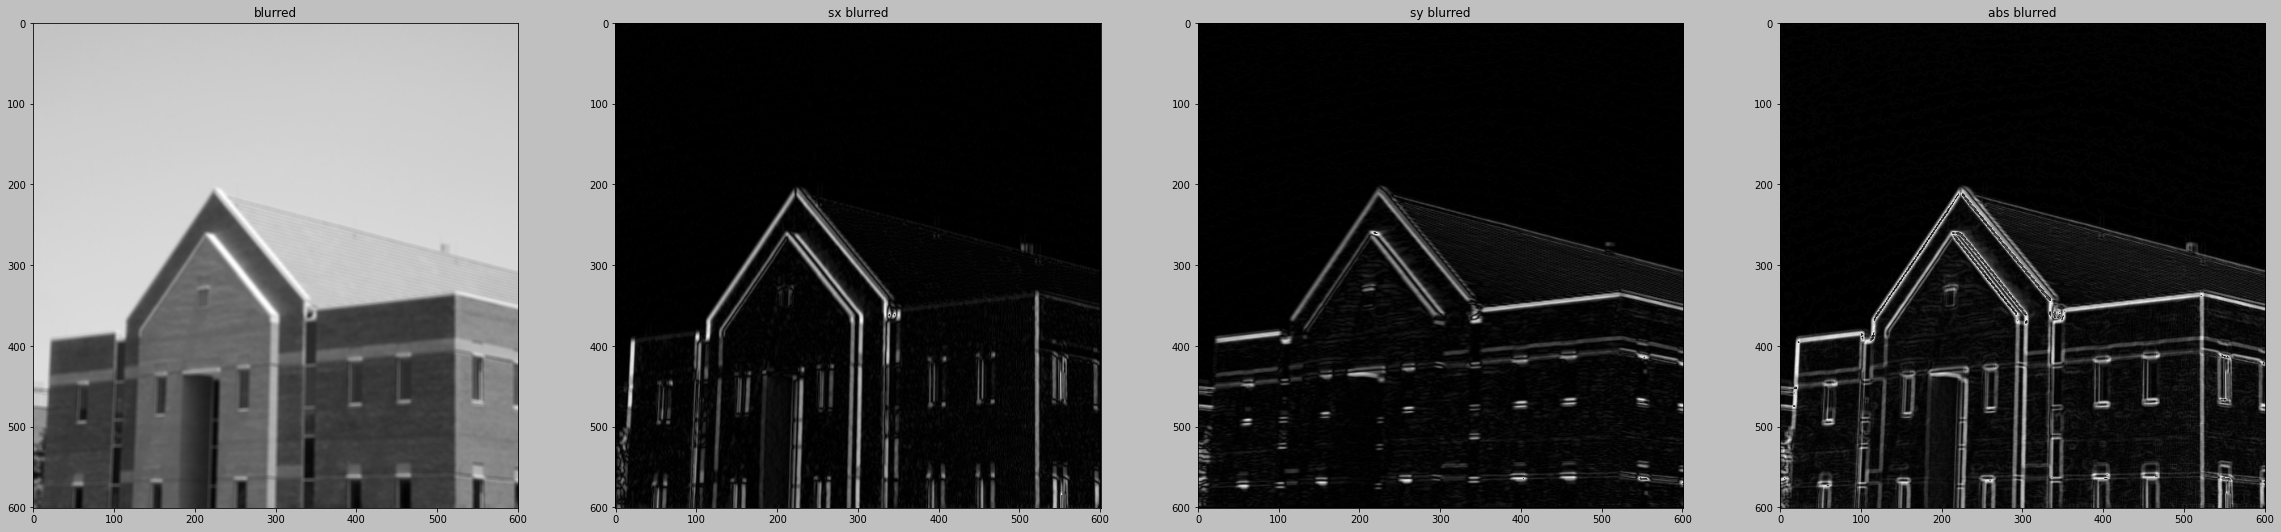

In [13]:
blurred = cv2.blur(img, (5, 5))
sxb = cv2.Sobel(blurred, cv2.CV_16S, 1, 0)
sxb = np.abs(sxb).astype(np.uint8)
syb = cv2.Sobel(blurred, cv2.CV_16S, 0, 1)
syb = np.abs(syb).astype(np.uint8)
absb = sxb + syb

pltImgs([blurred, sxb, syb, absb], ['blurred', 'sx blurred', 'sy blurred', 'abs blurred'])

#Slide 31

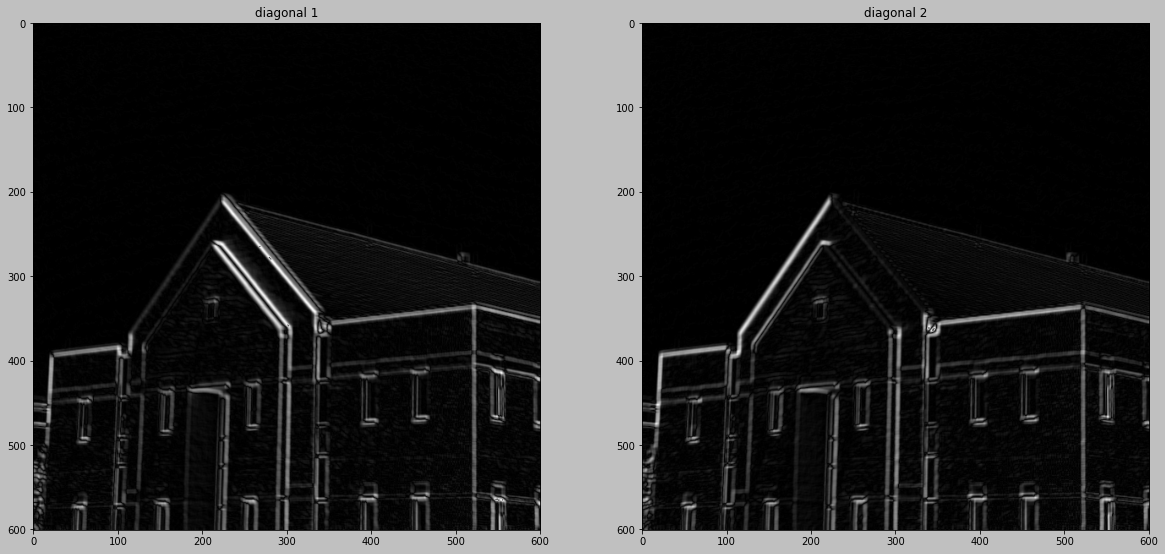

In [14]:
d1 = np.array([[0, 1, 2],
                [-1, 0, 1],
                [-2, -1, 0]])

d2 = np.array([[-2, -1, 0],
                [-1, 0, 1],
                [0, 1, 2]])

sd1 = cv2.filter2D(blurred, cv2.CV_16S, d1)
sd1 = np.abs(sd1).astype(np.uint8)
sd2 = cv2.filter2D(blurred, cv2.CV_16S, d2)
sd2 = np.abs(sd2).astype(np.uint8)
pltImgs([sd1, sd2], ['diagonal 1', 'diagonal 2'])

#Slide 32

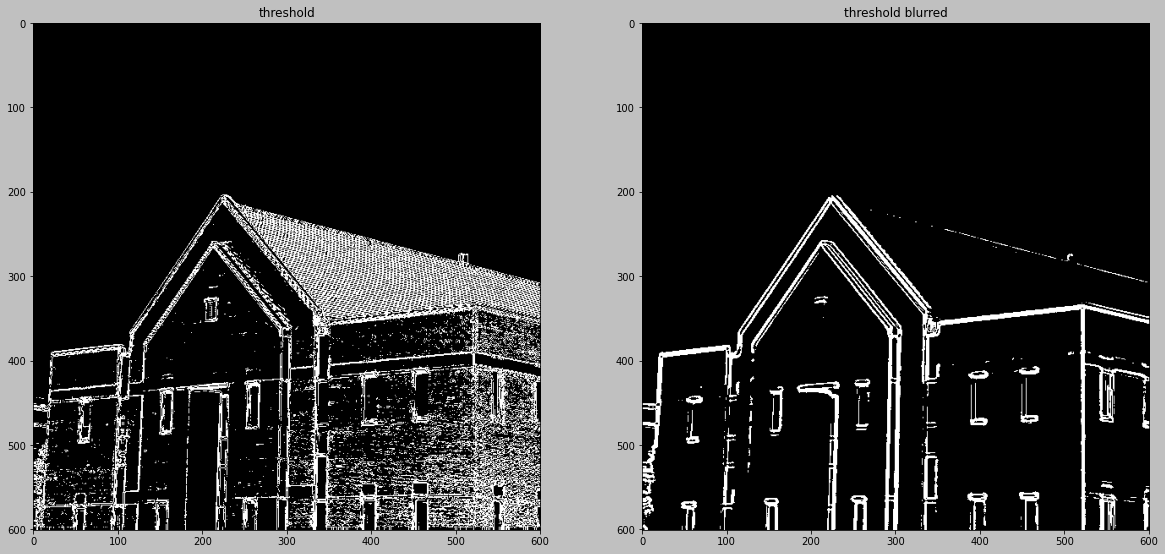

In [15]:
_, t = cv2.threshold(abs, abs.max()*0.33, 255, cv2.THRESH_BINARY)
_, tb = cv2.threshold(absb, absb.max()*0.33, 255, cv2.THRESH_BINARY)

pltImgs([t, tb], ['threshold', 'threshold blurred'])